# **Mục lục:**
## Phần 1: Giới thiệu
- **1.1 Bối cảnh và mục đích**
- **1.2 Giới thiệu về bộ dữ liệu**
## Phần 2: Khám phá tập dữ liệu
- **2.1 Tổng quan tập dữ liệu**
- **2.2 Xử lí và làm sạch dữ liệu**
- **2.3 Phân tích mô tả đơn biến**
## Phần 3: Mô hình hóa dữ liệu
- **3.1 Chuẩn hóa dữ liệu**
- **3.2 Đánh giá và chọn chỉ số cho mô hình**
- **3.3 Huấn luyện mô hình**
- **3.4 Trực quan hóa kết quả**

## Phần 4: Kết luận
- **4.1 Tóm tắt phát hiện**
- **4.2 Chiến lược phát triển**

------------------------------------------------------------------------------

# Phần 1: Giới thiệu

##1.1 Bối cảnh và mục đích:

Bạn được tuyển dụng vào một chuỗi khách sạn cao cấp để phân tích hiệu suất kinh doanh dựa trên dữ liệu đặt phòng từ tháng 3 năm 2023 đến đầu tháng 2 năm 2025. Ban quản lý khách sạn đang đối mặt với nhiều vấn đề kinh doanh và họ cần bạn tìm ra insights quan trọng của từng nhóm khách hàng để cải thiện trải nghiệm khách hàng và tối ưu doanh thu.

##1.2 Giới thiệu về bộ dữ liệu:

Bộ dữ liệu mô phỏng hệ thống đặt phòng của khách sạn gồm 6 bảng dữ liệu quan trọng.

|Tên bảng| Mô tả |
|--------|-------|
|Customers|Danh sách khách hàng|
|Rooms|Thông tin các phòng trong khách sạn|
|Bookings|Lịch sử đặt phòng của khách hàng|
|Payments|Các khoản thanh toán của khách|
|Services|Dịch vụ bổ sung mà khách sạn cung cấp|
|Service_Usage|Dữ liệu khách đã sử dụng dịch vụ nào|

# Phần 2: Khám phá tập dữ liệu

##2.1 Tổng quan dữ liệu:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None) 
pd.set_option("display.width", 300)  


In [2]:
df_booking = pd.read_csv("bookings_senior.csv")
df_customers_senior = pd.read_csv("customers_senior.csv")
df_payments_senior = pd.read_csv("payments_senior.csv")
df_rooms_senior = pd.read_csv("rooms_senior.csv")
df_service_usage_senior = pd.read_csv("service_usage_senior.csv")
df_services_senior = pd.read_csv("services_senior.csv")

Bảng booking

In [3]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   booking_id   5000 non-null   int64 
 1   customer_id  5000 non-null   int64 
 2   room_id      5000 non-null   int64 
 3   check_in     5000 non-null   object
 4   check_out    5000 non-null   object
 5   status       5000 non-null   object
 6   created_at   5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [4]:
df_booking.head()

,booking_id,customer_id,room_id,check_in,check_out,status,created_at
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19


In [5]:
df_booking.duplicated().sum()

np.int64(0)

Bảng customers

In [6]:
df_customers_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  500 non-null    int64 
 1   full_name    500 non-null    object
 2   email        500 non-null    object
 3   phone        500 non-null    int64 
 4   created_at   500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [7]:
df_customers_senior.head()

,customer_id,full_name,email,phone,created_at
0,1,Customer 1,customer1@mail.com,84987769332,2023-08-08 03:27:22.206023
1,2,Customer 2,customer2@mail.com,84995781527,2023-11-11 03:27:22.206033
2,3,Customer 3,customer3@mail.com,84969411145,2023-10-07 03:27:22.206035
3,4,Customer 4,customer4@mail.com,84917802932,2023-08-05 03:27:22.206037
4,5,Customer 5,customer5@mail.com,84992266036,2024-06-02 03:27:22.206039


In [8]:
df_customers_senior.duplicated().sum()

np.int64(0)

Bảng payments

In [9]:
df_payments_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_id      3000 non-null   int64 
 1   booking_id      3000 non-null   int64 
 2   amount          3000 non-null   int64 
 3   payment_method  3000 non-null   object
 4   payment_date    3000 non-null   object
dtypes: int64(3), object(2)
memory usage: 117.3+ KB


In [10]:
df_payments_senior.head()

,payment_id,booking_id,amount,payment_method,payment_date
0,1,1172,1858,Credit Card,2023-12-20
1,2,2311,1275,PayPal,2024-05-23
2,3,651,216,Bank Transfer,2023-11-28
3,4,3016,1407,Crypto,2024-12-28
4,5,3516,1961,PayPal,2023-03-11


In [11]:
df_payments_senior.duplicated().sum()

np.int64(0)

Bảng rooms

In [12]:
df_rooms_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   room_id          200 non-null    int64 
 1   room_number      200 non-null    object
 2   room_type        200 non-null    object
 3   price_per_night  200 non-null    int64 
 4   status           200 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [13]:
df_rooms_senior.head()

,room_id,room_number,room_type,price_per_night,status
0,1,R101,Standard,78,Available
1,2,R102,Suite,55,Booked
2,3,R103,Deluxe,461,Available
3,4,R104,Deluxe,184,Booked
4,5,R105,Suite,88,Available


In [14]:
df_rooms_senior.duplicated().sum()

np.int64(0)

Bảng service_usage

In [15]:
df_service_usage_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   usage_id     7000 non-null   int64
 1   booking_id   7000 non-null   int64
 2   service_id   7000 non-null   int64
 3   quantity     7000 non-null   int64
 4   total_price  7000 non-null   int64
dtypes: int64(5)
memory usage: 273.6 KB


In [16]:
df_service_usage_senior.head()

,usage_id,booking_id,service_id,quantity,total_price
0,1,4536,8,5,480
1,2,4689,9,2,212
2,3,4754,8,1,96
3,4,3544,3,3,390
4,5,3790,6,3,81


In [17]:
df_service_usage_senior.duplicated().sum()

np.int64(0)

Bảng service

In [18]:
df_services_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   service_id    9 non-null      int64 
 1   service_name  9 non-null      object
 2   price         9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes


In [19]:
df_services_senior.head(9)

,service_id,service_name,price
0,1,Breakfast,112
1,2,Laundry,82
2,3,Spa,130
3,4,Gym,23
4,5,Airport Pickup,124
5,6,Room Service,27
6,7,Mini Bar,86
7,8,Tour Package,96
8,9,VIP Lounge,106


In [20]:
# Gộp thành một bảng chung
df_join_customer = pd.merge(df_booking, df_customers_senior, how = 'inner', on = 'customer_id')
df_join_payment = pd.merge(df_join_customer, df_payments_senior, how = 'inner', on = 'booking_id')
df_join_room = pd.merge(df_join_payment, df_rooms_senior, how = 'inner', on = 'room_id')
df_join_services_use = pd.merge(df_join_room, df_service_usage_senior, how = 'inner', on = 'booking_id')
df_join_all = pd.merge(df_join_services_use, df_services_senior, how = 'inner', on = 'service_id')

In [21]:
df_join_all.head()

,booking_id,customer_id,room_id,check_in,check_out,status_x,created_at_x,full_name,email,phone,created_at_y,payment_id,amount,payment_method,payment_date,room_number,room_type,price_per_night,status_y,usage_id,service_id,quantity,total_price,service_name,price
0,6,408,188,2024-03-05,2024-03-08,Pending,2024-03-05,Customer 408,customer408@mail.com,84955650060,2024-09-17 03:27:22.206867,1365,348,Cash,2023-07-21,R288,Presidential,469,Available,5090,5,4,496,Airport Pickup,124
1,7,309,112,2023-08-04,2023-08-06,Pending,2023-08-04,Customer 309,customer309@mail.com,84934385101,2023-07-31 03:27:22.206665,1779,1245,Crypto,2024-09-23,R212,Deluxe,304,Available,802,2,5,410,Laundry,82
2,11,57,198,2024-01-13,2024-01-14,Confirmed,2024-01-13,Customer 57,customer57@mail.com,84912804469,2024-04-07 03:27:22.206144,357,1329,Crypto,2023-07-11,R298,Deluxe,155,Available,700,3,5,650,Spa,130
3,11,57,198,2024-01-13,2024-01-14,Confirmed,2024-01-13,Customer 57,customer57@mail.com,84912804469,2024-04-07 03:27:22.206144,357,1329,Crypto,2023-07-11,R298,Deluxe,155,Available,1348,9,5,530,VIP Lounge,106
4,11,57,198,2024-01-13,2024-01-14,Confirmed,2024-01-13,Customer 57,customer57@mail.com,84912804469,2024-04-07 03:27:22.206144,357,1329,Crypto,2023-07-11,R298,Deluxe,155,Available,4326,3,5,650,Spa,130


In [22]:
df_join_all.shape

(4177, 25)

In [23]:
df_join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   booking_id       4177 non-null   int64 
 1   customer_id      4177 non-null   int64 
 2   room_id          4177 non-null   int64 
 3   check_in         4177 non-null   object
 4   check_out        4177 non-null   object
 5   status_x         4177 non-null   object
 6   created_at_x     4177 non-null   object
 7   full_name        4177 non-null   object
 8   email            4177 non-null   object
 9   phone            4177 non-null   int64 
 10  created_at_y     4177 non-null   object
 11  payment_id       4177 non-null   int64 
 12  amount           4177 non-null   int64 
 13  payment_method   4177 non-null   object
 14  payment_date     4177 non-null   object
 15  room_number      4177 non-null   object
 16  room_type        4177 non-null   object
 17  price_per_night  4177 non-null   

In [24]:
df_join_all.nunique().sort_values(ascending=False)

usage_id           3166
payment_id         2214
booking_id         1683
amount             1293
payment_date        698
check_out           664
check_in            661
created_at_x        661
customer_id         480
phone               480
created_at_y        480
full_name           480
email               480
room_number         200
room_id             200
price_per_night     167
total_price          45
price                 9
service_name          9
service_id            9
room_type             5
quantity              5
payment_method        5
status_x              3
status_y              2
dtype: int64

In [25]:
category_cols = ['payment_method', 'room_type', 'service_name', 'status_x', 'status_y']
for cols in category_cols:
    print(cols + ": ", np.sort(df_join_all[cols].unique().astype(str)))
    print("\r")
    print("----------")
    print("\r")

payment_method:  ['Bank Transfer' 'Cash' 'Credit Card' 'Crypto' 'PayPal']

----------

room_type:  ['Deluxe' 'Executive' 'Presidential' 'Standard' 'Suite']

----------

service_name:  ['Airport Pickup' 'Breakfast' 'Gym' 'Laundry' 'Mini Bar' 'Room Service'
 'Spa' 'Tour Package' 'VIP Lounge']

----------

status_x:  ['Cancelled' 'Confirmed' 'Pending']

----------

status_y:  ['Available' 'Booked']

----------



##2.2 Xử lí và làm sạch dữ liệu:

Xóa cột dư thừa

In [26]:
columns_to_drop = [
    "room_number", "usage_id",  # ID không quan trọng
    "created_at_x", "created_at_y", "payment_date", # Cột trùng hoặc không cần thiết
    "full_name", "email", "phone"
]

# Loại bỏ các cột không cần thiết
df_join_all = df_join_all.drop(columns=columns_to_drop)

Dữ liệu thiếu

In [27]:
def calc_null_prc(df):
    newdf = df.isna().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by = 'null_rate', ascending = False)

In [28]:
calc_null_prc(df_join_all)

,null_count,null_rate
booking_id,0,0.0
customer_id,0,0.0
room_id,0,0.0
check_in,0,0.0
check_out,0,0.0
status_x,0,0.0
payment_id,0,0.0
amount,0,0.0
payment_method,0,0.0
room_type,0,0.0


Dữ liệu trùng lập

In [29]:
df_join_all.duplicated().sum()

np.int64(46)

In [30]:
df_join_all.drop_duplicates(inplace = True)

Chuyển đổi dữ liệu

In [31]:
# Dạng datetime 
df_join_all['check_in'] = pd.to_datetime(df_join_all['check_in'])
df_join_all['check_out'] = pd.to_datetime(df_join_all['check_out'])

In [32]:
# Đổi tên cột 'total_price'
df_join_all.rename(columns= {"total_price" : "total_price_service", "status_x" : "status_booking", "status_y" : "status_room"},inplace = True)

In [33]:
# Thêm cột
df_join_all['total_spent'] = df_join_all['amount'] + df_join_all['total_price_service']
df_join_all['night_days'] = (df_join_all['check_out'] - df_join_all['check_in']).dt.days
df_join_all['year_month'] = df_join_all['check_in'].dt.strftime('%Y-%m')

##2.3 Phân tích mô tả đơn biến

Total Spent

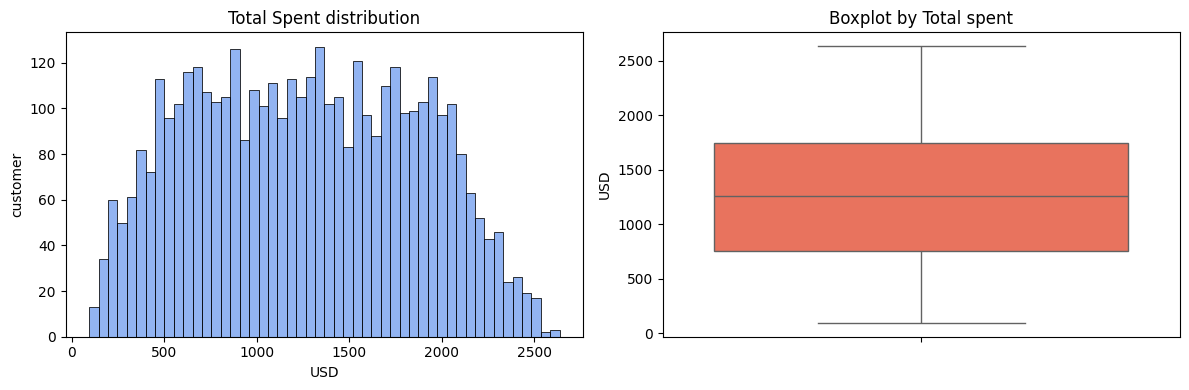

In [34]:
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data = df_join_all['total_spent'], bins = 50, alpha = 0.7, color = 'cornflowerblue')
plt.title('Total Spent distribution')
plt.xlabel('USD')
plt.ylabel('customer')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data = df_join_all['total_spent'], color = 'tomato')
plt.title('Boxplot by Total spent')
plt.ylabel('USD')
plt.tight_layout()
plt.show()

Histogram:

- Biểu đồ cho thấy dữ liệu phân phối khá đều, tổng chi tiêu của khách hàng cho một lần đặt phòng tập trung nhiều trong khoảng 500 - 2000 USD.
- Một số ít khách hàng có chi tiêu trên 2500 USD nhưng số lượng rất nhỏ.

Boxplot:

- Median: Khoảng 1200 USD, thể hiện mức chi tiêu trung bình của khách hàng.
- Khoảng IQR: 50% khách hàng chi tiêu trong khoảng 800 - 1700 USD.
- Không có giá trị ngoại lai cho thấy không có chi tiêu nào bất thường.

Night Days

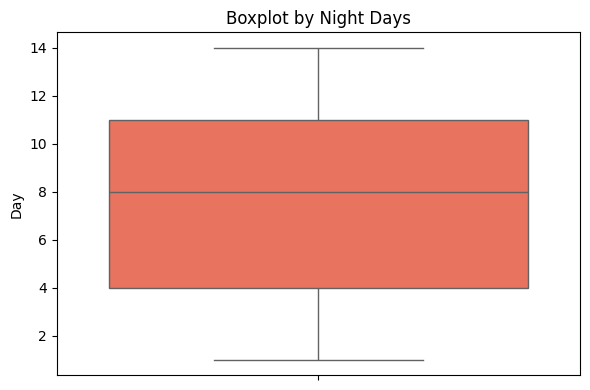

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = df_join_all['night_days'], color = 'tomato')
plt.title('Boxplot by Night Days')
plt.ylabel('Day')
plt.tight_layout()
plt.show()

- Median: Thời gian lưu trú trung bình của khách hàng khoảng 8 đêm.
- IQR: Phần lớn khách hàng lưu trú từ 4 - 11 đêm.
- Không có khách hàng có thời gian lưu trú quá khác biệt với phần còn lại.

Total Price Service

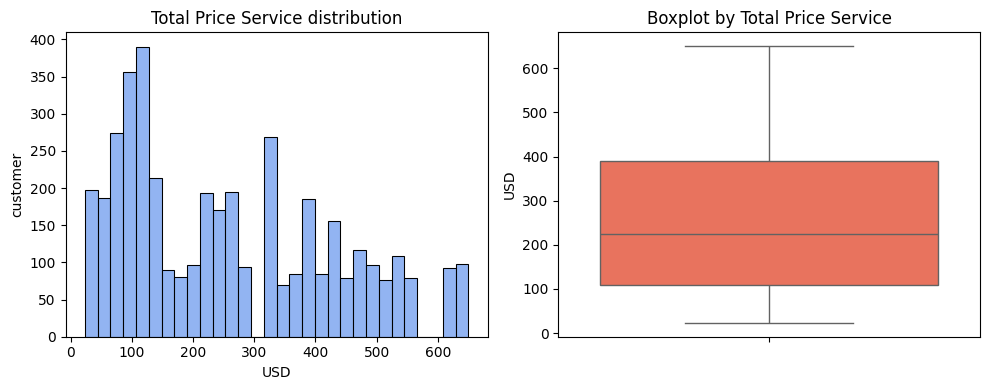

In [36]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data = df_join_all['total_price_service'], bins = 30, alpha = 0.7, color = 'cornflowerblue')
plt.title('Total Price Service distribution')
plt.xlabel('USD')
plt.ylabel('customer')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data = df_join_all['total_price_service'], color = 'tomato')
plt.title('Boxplot by Total Price Service')
plt.ylabel('USD')
plt.tight_layout()
plt.show()

Histogram:

- Tổng chi dịch vụ có sự phân tán khá rộng, dao động từ 20 đến hơn 600 USD.
- Dữ liệu có nhiều đỉnh, cho thấy một số mức phí dịch vụ phổ biến hơn hẳn ( Ví dụ: 100 USD, 250 USD,...).
- Phần lớn khách hàng chi trả dưới 200 USD dịch vụ cho mỗi lần đặt phòng.

Boxplot:

- Median: Mức chi trả trung bình cho dịch vụ vào khoảng 200 USD.
- IQR: Phần lớn số tiền dịch vụ mà khách chi tiêu rơi vào khoảng 100 - 400 USD.
- Không có giá trị ngoại lai rõ ràng, chứng tỏ các mức chi tiêu nằm trong phạm vi hợp lí.

Payment Method

In [37]:
df_payment_method = df_join_all.groupby('payment_method').agg(total = ('payment_id', 'count')).reset_index()

In [38]:
df_payment_time = df_join_all.groupby(['year_month', 'payment_method']).agg(total = ('payment_id', 'count')).reset_index()

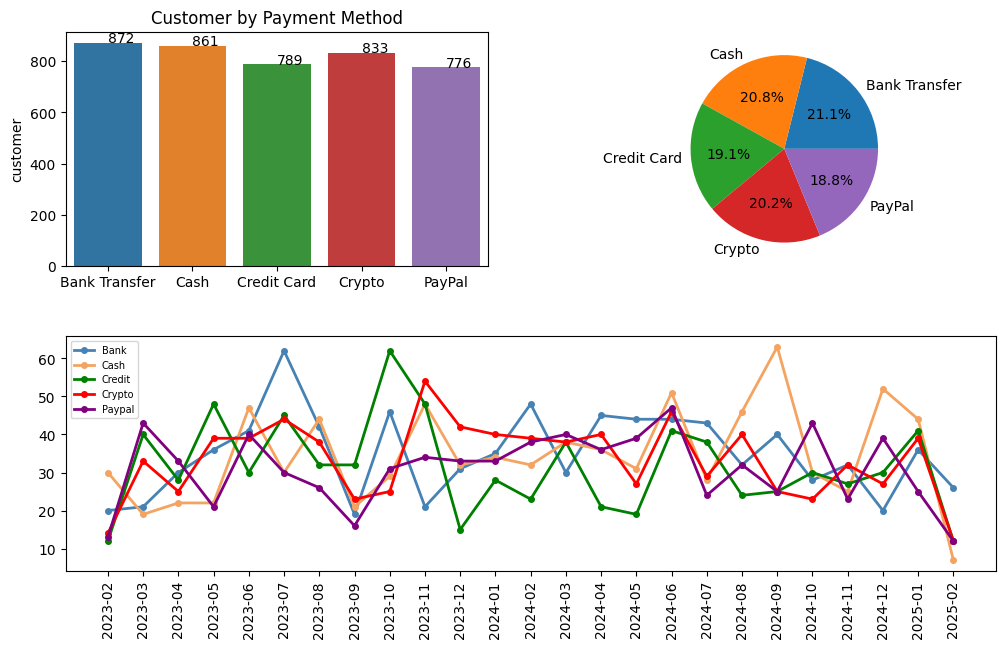

In [39]:
plt.figure(figsize = (12, 7))

ax1 = plt.subplot(2, 2, 1)
sns.barplot(data = df_payment_method, x = 'payment_method', y = 'total', hue = 'payment_method')
for index, value in enumerate(df_payment_method['total']):
    plt.text(index, value, str(value))
plt.title('Customer by Payment Method')
plt.ylabel('customer')
plt.xlabel('')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_payment_method['total'], labels = df_payment_method['payment_method'], autopct= '%1.1f%%')

ax3 = plt.subplot(2, 1, 2)
df_bank = df_payment_time[df_payment_time['payment_method'] == 'Bank Transfer']
plt.plot(df_bank['year_month'], df_bank['total'], label = 'Bank', marker = 'o', color = 'steelblue', linewidth = 2, markersize = 4)

df_cash = df_payment_time[df_payment_time['payment_method'] == 'Cash']
plt.plot(df_cash['year_month'], df_cash['total'], label = 'Cash', marker = 'o', color = 'sandybrown', linewidth = 2, markersize = 4)

df_credit = df_payment_time[df_payment_time['payment_method'] == 'Credit Card']
plt.plot(df_credit['year_month'], df_credit['total'], label = 'Credit', marker = 'o', color = 'green', linewidth = 2, markersize = 4)

df_crypto = df_payment_time[df_payment_time['payment_method'] == 'Crypto']
plt.plot(df_crypto['year_month'], df_crypto['total'], label = 'Crypto', marker = 'o', color = 'red', linewidth = 2, markersize = 4)

df_Paypal = df_payment_time[df_payment_time['payment_method'] == 'PayPal']
plt.plot(df_Paypal['year_month'], df_Paypal['total'], label = 'Paypal', marker = 'o', color = 'purple', linewidth = 2, markersize = 4)

plt.xticks(rotation = 90)
plt.legend(loc = 'upper left', fontsize = 7)
plt.subplots_adjust(hspace=0.3)
plt.show()

Room Type

In [40]:
df_room_type = df_join_all.groupby('room_type').agg(total = ('room_id', 'count')).reset_index()

In [41]:
df_room_time = df_join_all.groupby(['year_month', 'room_type']).agg(total = ('room_id', 'count')).reset_index()

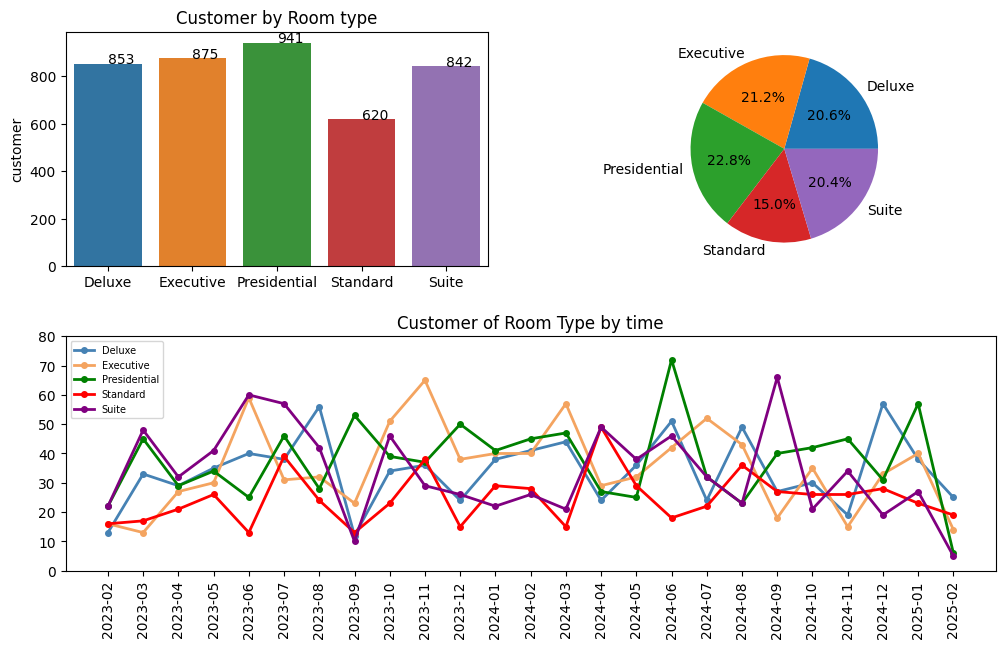

In [42]:
plt.figure(figsize = (12, 7))

ax1 = plt.subplot(2, 2, 1)
sns.barplot(data = df_room_type, x = 'room_type', y = 'total', hue = 'room_type')
for index, value in enumerate(df_room_type['total']):
    plt.text(index, value, str(value))
plt.title('Customer by Room type')
plt.ylabel('customer')
plt.xlabel('')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_room_type['total'], labels = df_room_type['room_type'], autopct= '%1.1f%%')

ax3 = plt.subplot(2, 1, 2)
df_Deluxe = df_room_time[df_room_time['room_type'] == 'Deluxe']
plt.plot(df_Deluxe['year_month'], df_Deluxe['total'], label = 'Deluxe', marker = 'o', color = 'steelblue', linewidth = 2, markersize = 4)

df_Executive = df_room_time[df_room_time['room_type'] == 'Executive']
plt.plot(df_Executive['year_month'], df_Executive['total'], label = 'Executive', marker = 'o', color = 'sandybrown', linewidth = 2, markersize = 4)

df_President = df_room_time[df_room_time['room_type'] == 'Presidential']
plt.plot(df_President['year_month'], df_President['total'], label = 'Presidential', marker = 'o', color = 'green', linewidth = 2, markersize = 4)

df_Standard = df_room_time[df_room_time['room_type'] == 'Standard']
plt.plot(df_Standard['year_month'], df_Standard['total'], label = 'Standard', marker = 'o', color = 'red', linewidth = 2, markersize = 4)

df_Suite = df_room_time[df_room_time['room_type'] == 'Suite']
plt.plot(df_Suite['year_month'], df_Suite['total'], label = 'Suite', marker = 'o', color = 'purple', linewidth = 2, markersize = 4)
plt.title('Customer of Room Type by time')
plt.xticks(rotation = 90)
plt.ylim(0,80)
plt.legend(loc = 'upper left', fontsize = 7)
plt.subplots_adjust(hspace=0.3)
plt.show()

Service Type

In [43]:
service_mapping = {
    'Airport Pickup': 'Transportation',
    'Breakfast': 'Food&Beverage',
    'Mini Bar': 'Food&Beverage',
    'Room Service': 'Convenience',
    'Gym': 'Fitness',
    'Spa': 'Fitness',
    'Laundry': 'Convenience',
    'Tour Package': 'Tours',
    'VIP Lounge' : 'VIP Lounge'
}

df_join_all['service_type'] = df_join_all['service_name'].map(service_mapping)

In [44]:
df_service = df_join_all.groupby('service_type').agg(total = ('service_id', 'count')).reset_index()

In [45]:
df_service_time = df_join_all.groupby(['year_month', 'service_type']).agg(total = ('service_id', 'count')).reset_index()

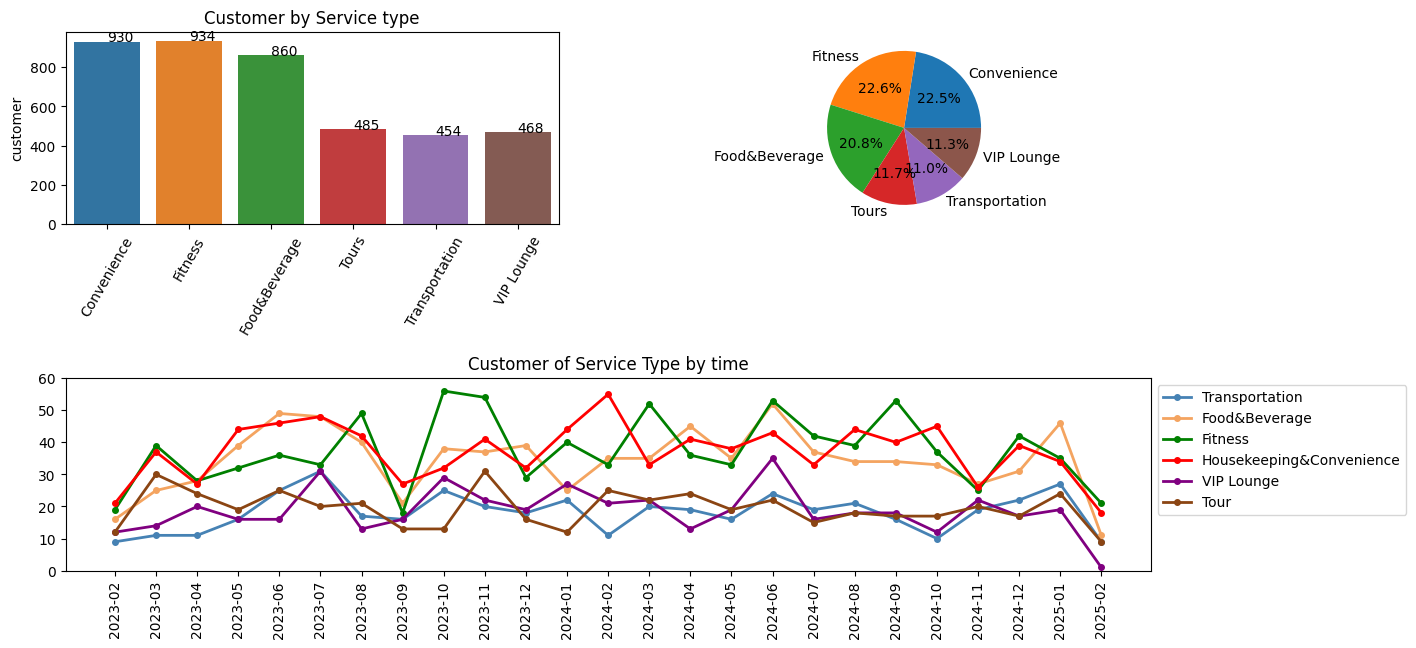

In [46]:
plt.figure(figsize = (14, 7))

ax1 = plt.subplot(2, 2, 1)
sns.barplot(data = df_service, x = 'service_type', y = 'total', hue = 'service_type')
for index, value in enumerate(df_service['total']):
    plt.text(index, value, str(value))
plt.title('Customer by Service type')
plt.ylabel('customer')
plt.xticks(rotation = 60)
plt.xlabel('')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_service['total'], labels = df_service['service_type'], autopct= '%1.1f%%')

ax3 = plt.subplot(2, 1, 2)
df_trans = df_service_time[df_service_time['service_type'] == 'Transportation']
plt.plot(df_trans['year_month'], df_trans['total'], label = 'Transportation', marker = 'o', color = 'steelblue', linewidth = 2, markersize = 4)

df_FnB = df_service_time[df_service_time['service_type'] == 'Food&Beverage']
plt.plot(df_FnB['year_month'], df_FnB['total'], label = 'Food&Beverage', marker = 'o', color = 'sandybrown', linewidth = 2, markersize = 4)

df_Fitness = df_service_time[df_service_time['service_type'] == 'Fitness']
plt.plot(df_Fitness['year_month'], df_Fitness['total'], label = 'Fitness', marker = 'o', color = 'green', linewidth = 2, markersize = 4)

df_House_Conven = df_service_time[df_service_time['service_type'] == 'Convenience']
plt.plot(df_House_Conven['year_month'], df_House_Conven['total'], label = 'Housekeeping&Convenience', marker = 'o', color = 'red', linewidth = 2, markersize = 4)

df_Luxury = df_service_time[df_service_time['service_type'] == 'VIP Lounge']
plt.plot(df_Luxury['year_month'], df_Luxury['total'], label = 'VIP Lounge', marker = 'o', color = 'purple', linewidth = 2, markersize = 4)

df_Tour = df_service_time[df_service_time['service_type'] == 'Tours']
plt.plot(df_Tour['year_month'], df_Tour['total'], label = 'Tour', marker = 'o', color = 'saddlebrown', linewidth = 2, markersize = 4)
plt.title('Customer of Service Type by time')
plt.xticks(rotation = 90)
plt.ylim(0, 60)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(hspace=0.8)
plt.show()

Status Booking

In [47]:
df_status_booking = df_join_all.groupby('status_booking').agg(total = ('booking_id', 'count')).reset_index()

In [48]:
df_status_time = df_join_all.groupby(['year_month', 'status_booking']).agg(total = ('booking_id', 'count')).reset_index()

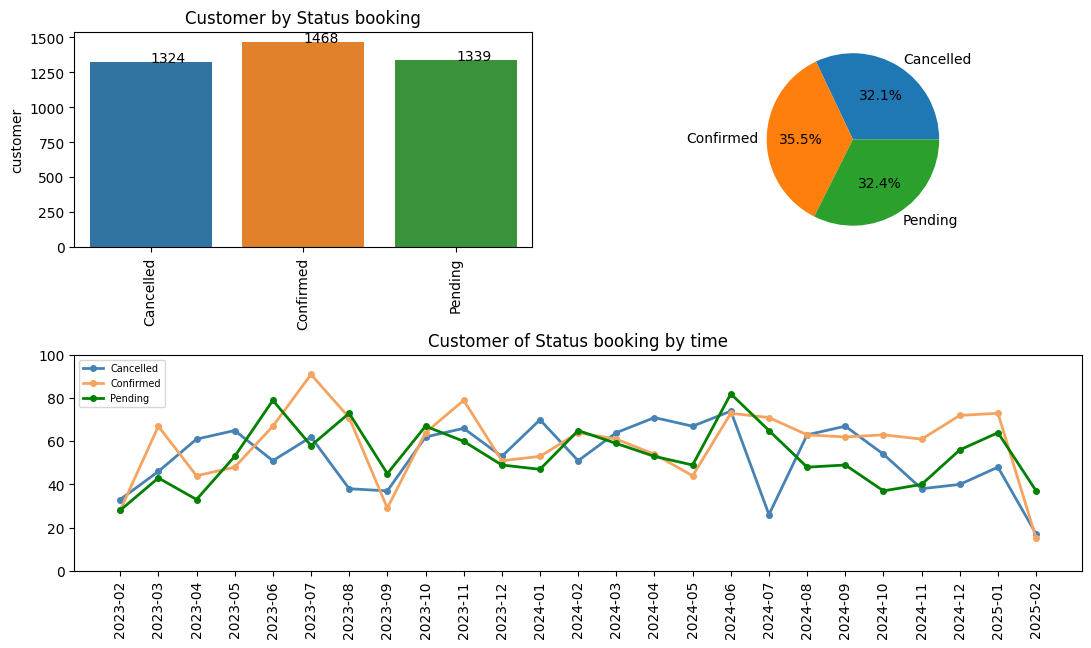

In [63]:
plt.figure(figsize = (13, 7))

ax1 = plt.subplot(2, 2, 1)
sns.barplot(data = df_status_booking, x = 'status_booking', y = 'total', hue = 'status_booking')
for index, value in enumerate(df_status_booking['total']):
    plt.text(index, value, str(value))
plt.title('Customer by Status booking')
plt.ylabel('customer')
plt.xticks(rotation = 90)
plt.xlabel('')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_status_booking['total'], labels = df_status_booking['status_booking'], autopct= '%1.1f%%')

ax3 = plt.subplot(2, 1, 2)
df_cancel = df_status_time[df_status_time['status_booking'] == 'Cancelled']
plt.plot(df_cancel['year_month'], df_cancel['total'], label = 'Cancelled', marker = 'o', color = 'steelblue', linewidth = 2, markersize = 4)

df_confirm = df_status_time[df_status_time['status_booking'] == 'Confirmed']
plt.plot(df_confirm['year_month'], df_confirm['total'], label = 'Confirmed', marker = 'o', color = 'sandybrown', linewidth = 2, markersize = 4)

df_pending = df_status_time[df_status_time['status_booking'] == 'Pending']
plt.plot(df_pending['year_month'], df_pending['total'], label = 'Pending', marker = 'o', color = 'green', linewidth = 2, markersize = 4)
plt.title('Customer of Status booking by time')
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.legend(loc = 'upper left', fontsize = 7)
plt.subplots_adjust(hspace=0.5)
plt.show()

# Phần 3: Mô hình hóa dữ liệu

##3.1 Chuẩn hóa dữ liệu

In [50]:
today = pd.Timestamp("2025-03-01")


customer_segment = df_join_all.groupby("customer_id").agg(
    Recency=("check_out", lambda x: (today - x.max()).days),
    Frequency=("booking_id", "count"),  
    Monetary=("total_spent", "sum"),
    avg_nights=("night_days", "mean"),
    total_service_used=("quantity", "sum"),
    most_booked_room=("room_type", lambda x: x.mode()[0] if not x.mode().empty else None),
    preferred_payment_method=("payment_method", lambda x: x.mode()[0] if not x.mode().empty else None),
    most_used_service=("service_type", lambda x: x.mode()[0] if not x.mode().empty else None),
).reset_index()

# Xem trước kết quả
customer_segment.head()


,customer_id,Recency,Frequency,Monetary,avg_nights,total_service_used,most_booked_room,preferred_payment_method,most_used_service
0,1,105,5,8652,8.0,12,Standard,Bank Transfer,Fitness
1,2,655,5,6571,3.6,8,Executive,Credit Card,Convenience
2,3,23,4,4130,9.0,17,Standard,Bank Transfer,Convenience
3,4,99,2,3033,14.0,4,Standard,Cash,Fitness
4,5,558,1,1340,7.0,3,Deluxe,Crypto,Fitness


In [51]:
# Xóa cột customer_id
customer_segment.drop(columns = 'customer_id', inplace = True)

In [52]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [53]:
# Tách dữ liệu số và dữ liệu phân loại
num_cols = customer_segment.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = customer_segment.select_dtypes(include=['object']).columns.tolist()

# Chuẩn hóa dữ liệu số bằng MinMaxScaler
scaler = MinMaxScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(customer_segment[num_cols]), columns=num_cols)

# Mã hóa dữ liệu phân loại bằng One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output = False)
df_encoded_cat = pd.DataFrame(encoder.fit_transform(customer_segment[cat_cols]))

# Đặt lại tên cột cho dữ liệu mã hóa
encoded_cat_columns = encoder.get_feature_names_out(cat_cols)
df_encoded_cat.columns = encoded_cat_columns

# Kết hợp dữ liệu đã chuẩn hóa
df_processed = pd.concat([df_scaled_num, df_encoded_cat], axis=1)
df_processed.head()

,Recency,Frequency,Monetary,avg_nights,total_service_used,most_booked_room_Executive,most_booked_room_Presidential,most_booked_room_Standard,most_booked_room_Suite,preferred_payment_method_Cash,preferred_payment_method_Credit Card,preferred_payment_method_Crypto,preferred_payment_method_PayPal,most_used_service_Fitness,most_used_service_Food&Beverage,most_used_service_Tours,most_used_service_Transportation,most_used_service_VIP Lounge
0,0.135616,0.117647,0.209733,0.538462,0.112245,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.889041,0.117647,0.158222,0.200000,0.071429,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.023288,0.088235,0.097799,0.615385,0.163265,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.127397,0.029412,0.070645,1.000000,0.030612,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.756164,0.000000,0.028738,0.461538,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


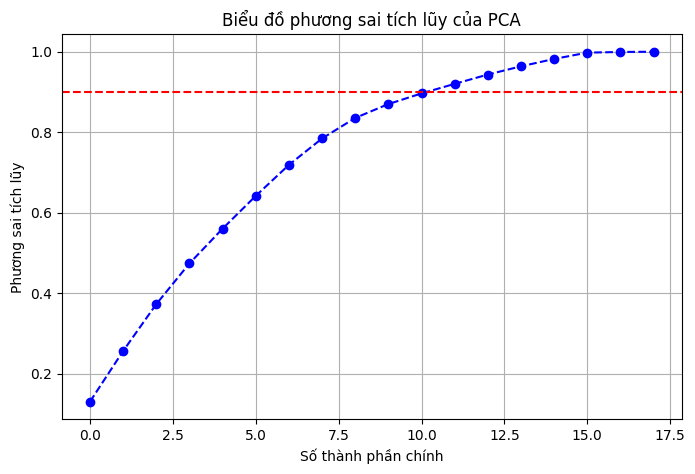

In [54]:
# Áp dụng PCA
pca = PCA()
pca.fit(df_processed)

# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(0.9, color='r', linestyle='--')
plt.xlabel('Số thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.title('Biểu đồ phương sai tích lũy của PCA')
plt.grid(True)
plt.show()

In [55]:
# Xác định số thành phần PCA giữ lại (>= 90% phương sai)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_pca_components = np.argmax(explained_variance >= 0.90) + 1

# Áp dụng PCA với số thành phần tối ưu
pca = PCA(n_components=optimal_pca_components)
df_pca = pca.fit_transform(df_processed)

# Kiểm tra kích thước dữ liệu sau PCA
df_pca.shape

(480, 12)

- Chọn số thành phần PCA: 12
- Dữ liệu sau khi giảm chiều: 480 dòng × 12 cột

##3.2 Đánh giá và chọn chỉ số cho mô hình

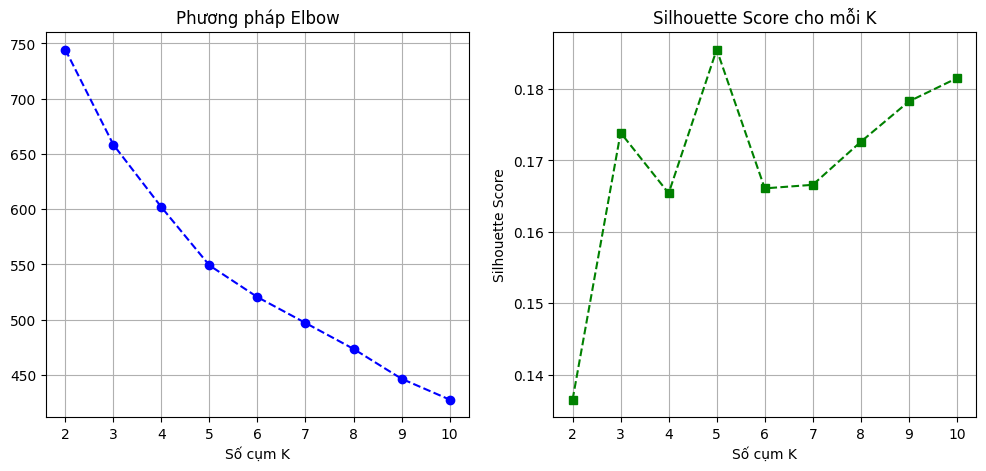

In [56]:
inertias = []
silhouette_scores = []
K = range(2, 11)  # Thử nghiệm từ 2 đến 10 cụm

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    
    # Tính WCSS (Within-Cluster Sum of Squares) cho Elbow method
    inertias.append(kmeans.inertia_)
    
    # Tính Silhouette Score
    silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Vẽ biểu đồ Elbow và Silhouette Score
plt.figure(figsize=(12, 5))

# Biểu đồ Elbow
ax1 = plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o', linestyle='--', color='b')
plt.xlabel('Số cụm K')
plt.ylabel('')
plt.title('Phương pháp Elbow')
plt.grid(True)

# Biểu đồ Silhouette Score
ax2 = plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', linestyle='--', color='g')
plt.xlabel('Số cụm K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score cho mỗi K')
plt.grid(True)

plt.show()


- Elbow Method:inertia giảm mạnh từ k=2 đến k=5, sau k=5 inertia giảm không đáng kể -> k=5 thì chỉ số inertia đạt giá trị tối ưu nhất.
- Silhouette: với k=5 thì silhouette đạt giá trị cao nhất.

Nhận xét: Dựa vào kết quả trên K = 5 tối ưu hơn.

##3.3 Huấn luyện mô hình

In [57]:
# Tiến hành phân cụm với k = 5
kmeans = KMeans(n_clusters = 5, random_state=42, n_init=10)
customer_segment["Cluster"] = kmeans.fit_predict(df_pca)

##3.4 Trực quan hóa kết quả

In [58]:
customer_segment.head()

,Recency,Frequency,Monetary,avg_nights,total_service_used,most_booked_room,preferred_payment_method,most_used_service,Cluster
0,105,5,8652,8.0,12,Standard,Bank Transfer,Fitness,3
1,655,5,6571,3.6,8,Executive,Credit Card,Convenience,1
2,23,4,4130,9.0,17,Standard,Bank Transfer,Convenience,3
3,99,2,3033,14.0,4,Standard,Cash,Fitness,4
4,558,1,1340,7.0,3,Deluxe,Crypto,Fitness,3


In [59]:
customer_segment['Cluster'].value_counts()

Cluster
3    120
4    118
2     94
1     84
0     64
Name: count, dtype: int64

In [60]:
for feature in ["Monetary", "avg_nights", "total_service_used"]:
    print(f"Describe for {feature} by Cluster:")
    print(customer_segment.groupby("Cluster")[feature].describe())

Describe for Monetary by Cluster:
         count          mean          std    min      25%      50%       75%      max
Cluster                                                                              
0         64.0  11543.625000  8440.194951  511.0  5092.50  11456.5  14772.75  40578.0
1         84.0  10636.785714  7473.526227  346.0  4965.00   8666.5  14628.75  37154.0
2         94.0  10800.500000  7126.764234  397.0  5119.75   9666.5  14911.75  33283.0
3        120.0  11248.858333  7922.609799  317.0  5507.25   9211.0  16144.50  35203.0
4        118.0  10267.694915  7475.609125  179.0  4057.50   8390.5  15253.25  39790.0
Describe for avg_nights by Cluster:
         count      mean       std  min       25%       50%       75%   max
Cluster                                                                    
0         64.0  7.715823  2.686691  1.0  6.000000  7.575000  9.323333  14.0
1         84.0  7.513915  2.940746  3.0  5.143750  7.000000  9.363636  14.0
2         94.0  7.589193

C:\Users\Admin\AppData\Local\Temp\ipykernel_900\146303137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_segment, x = 'Cluster', y = 'Monetary', palette = 'Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_900\146303137.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_segment, x = 'Cluster', y = 'avg_nights', palette = 'Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_900\146303137.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_segment, x = 'Cluster', y = 'total_service_used', 

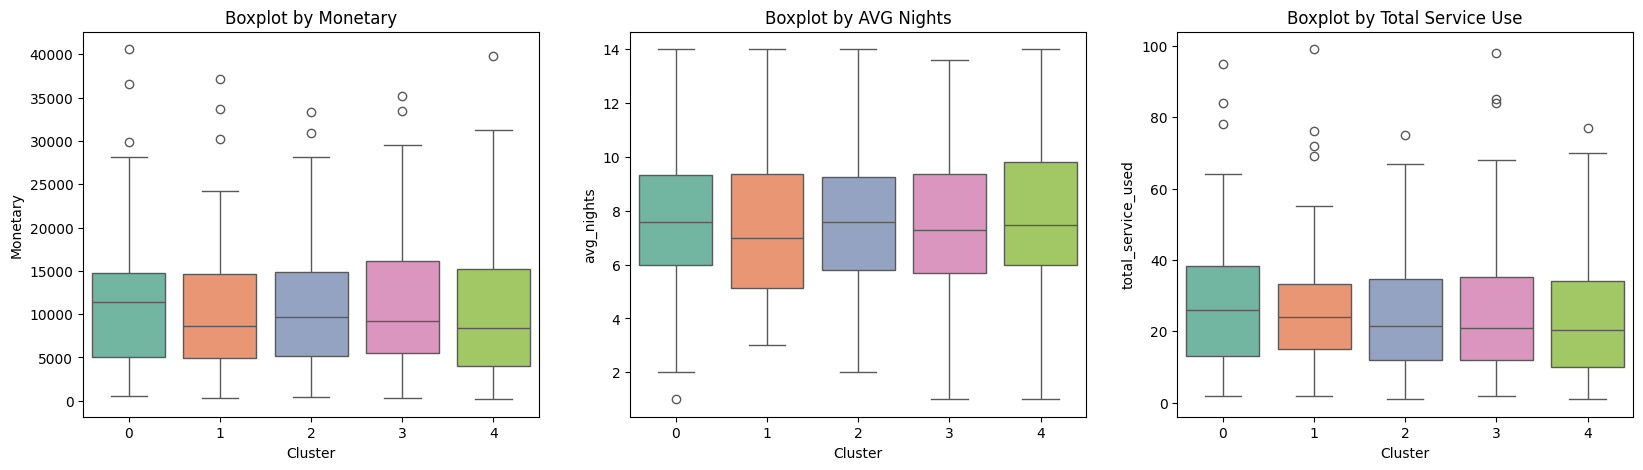

In [61]:
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data = customer_segment, x = 'Cluster', y = 'Monetary', palette = 'Set2')
plt.title('Boxplot by Monetary')

ax2 = plt.subplot(1, 3, 2)
sns.boxplot(data = customer_segment, x = 'Cluster', y = 'avg_nights', palette = 'Set2')
plt.title('Boxplot by AVG Nights')


ax3 = plt.subplot(1, 3, 3)
sns.boxplot(data = customer_segment, x = 'Cluster', y = 'total_service_used', palette = 'Set2')
plt.title('Boxplot by Total Service Use')

plt.subplots_adjust(hspace = 0.5)
plt.show()

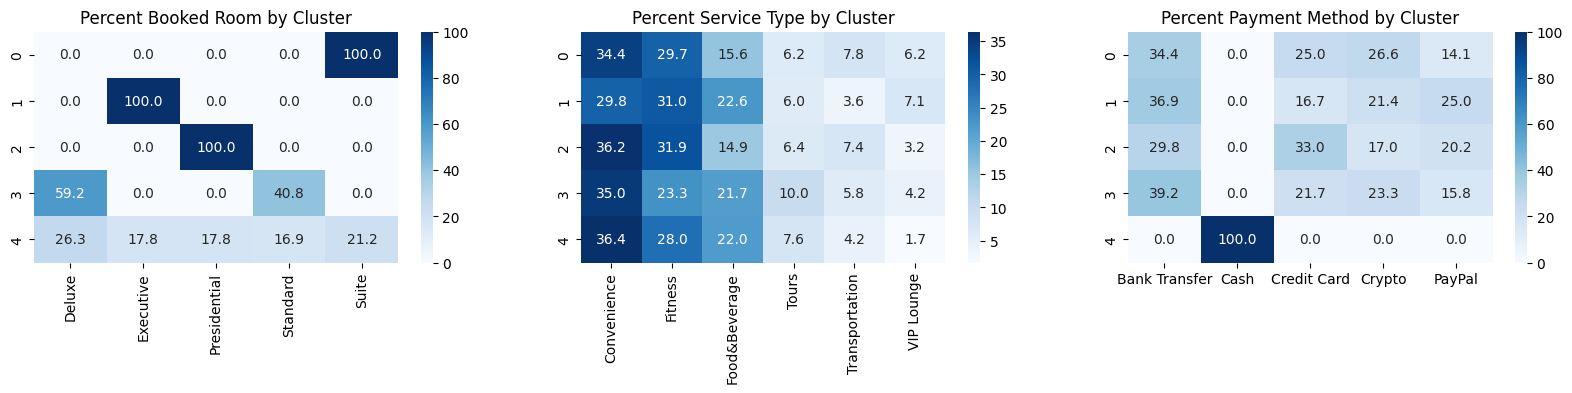

In [62]:
# room type theo cluster
room_type = customer_segment.groupby("Cluster")["most_booked_room"].value_counts().unstack()
room_type.fillna(0,inplace=True)
room_percent = room_type.div(room_type.sum(axis=1), axis=0) * 100

plt.figure(figsize=(20, 3))
ax1 = plt.subplot(1, 3, 1)
sns.heatmap(room_percent, annot=True, cmap="Blues", fmt=".1f")
plt.title("Percent Booked Room by Cluster")
plt.xlabel("")
plt.ylabel("")

# service type theo cluster
service_type = customer_segment.groupby("Cluster")["most_used_service"].value_counts().unstack()
service_type.fillna(0,inplace=True)
service_per = service_type.div(service_type.sum(axis=1), axis=0) * 100

ax2 = plt.subplot(1, 3, 2)
sns.heatmap(service_per, annot=True, cmap="Blues", fmt=".1f")
plt.title("Percent Service Type by Cluster")
plt.xlabel("")
plt.ylabel("")

# payment method theo cluster
payment_method = customer_segment.groupby("Cluster")["preferred_payment_method"].value_counts().unstack()
payment_method.fillna(0,inplace=True)
payment_method_per = payment_method.div(payment_method.sum(axis=1), axis=0) * 100

ax3 = plt.subplot(1, 3, 3)
sns.heatmap(payment_method_per, annot=True, cmap="Blues", fmt=".1f")
plt.title("Percent Payment Method by Cluster")
plt.xlabel("")
plt.ylabel("")

plt.show()

##3.5 Phân tích đặc điểm từng nhóm

Nhóm 0

- Chiếm khoảng 13%.
- Chi tiêu cao nhất trong các nhóm, trung bình khoảng 11,543.
- Sử dụng dịch vụ nhiều, số đêm lưu trú ở mức trung bình.
- Nhóm khách hàng này chỉ lựa chọn phòng Suite.
- Đa phần đều sử dụng các dịch vụ liên quan đến Convenience và Fitness.
- Phương thức thanh toán chủ yếu là Bank Transfer, Credit và Crypto.
- Xu hướng đặt phòng cao nhất vào tháng 6 và tháng 9. Nhóm này có sự dao động mạnh, thể hiện qua các giai đoạn tăng cao đột biến. Đây có thể là thời điểm diễn ra các sự kiện đặc biệt hoặc kỳ nghỉ cao cấp.

-> Đây là nhóm khách hàng VIP và trung thành với khách sạn.

Nhóm 1

- Chiếm khoảng 18%.
- Chi tiêu trung bình. 
- Số ngày lưu trú ít nhưng lại sử dụng dịch vụ khá cao chỉ sau nhóm khách hàng VIP.
- Nhóm này chỉ đặt phòng Executive thêm vào đó tỉ lệ sử dụng VIP Lounge (7.1%) nhiều nhất so với nhóm khác --> Có thể đây là nhóm khách chuyên về sự kiện, đặt khách sạn với mục đích tổ chức và vận hành sự kiện.
- Phương thức thanh toán chủ yếu là Bank Transfer, Crypto và PayPal.
- Xu hướng đặt phòng tăng mạnh vào giữa và cuối năm.

-> Đây là nhóm khách tổ chức sự kiện.

Nhóm 2

- Chiếm khoảng 20%.
- Chi tiêu khá cao chỉ đứng sau nhóm khách hàng VIP.
- Số ngày lưu trú trung binh, sử dụng dịch vụ khá thấp.
- Nhóm này chỉ đặt phòng Presidential. Chứng tỏ đây là nhóm khách giới thượng lưu như các quan chức cấp cao.
- Nhóm này có thói quen sử dụng dịch vụ giống nhóm khách VIP chủ yếu là các dịch vụ liên quan đến Convenience và Fitness.
- Thanh toán chủ yếu bằng Bank Transfer và Credit Card.
- Xu hướng đặt phòng tăng mạnh vào giữa và cuối năm.

-> Đây là nhóm khách thượng lưu chỉ đặt phòng Presidential để tận hưởng không gian sang trọng nhất. Họ chi tiêu cao nhưng ít sử dụng dịch vụ, chủ yếu ưu tiên sự tiện nghi và riêng tư.

Nhóm 3

- Đây là nhóm khách hàng phổ biến nhất của khách sạn chiếm tới 25%.
- Chi tiêu hợp lí không quá cao cũng không quá thấp, phù họp với phân khúc tầm trung.
- Thời gian lưu trú vừa phải, không ở lại quá lâu nhưng cũng không ngắn ngày.
- Mức sử dụng dịch vụ trung bình, có thể chỉ sử dụng các dịch vụ cơ bản như ăn uống và giải trí.
- Loại phòng chủ yếu là Standard và Deluxe đảm bảo đủ tiện nghi nhưng không quá đắt đỏ. Nhu cầu của họ về các dịch vụ du lịch (Tour) cao nhất trong các nhóm --> Đây có thể là nhóm khách phổ thông có các chuyến du lịch cá nhân hoặc gia đình.
- Thanh toán chủ yếu qua Bank Transfer và Credit Card.
- Xu hướng ổn định quanh năm nhưng có sự gia tăng nhẹ vào các tháng 5-7 và 12. Điều này phù hợp với nhu cầu du lịch của khách phổ thông, đặc biệt trong kỳ nghỉ hè và cuối năm.

-> Đây là nhóm khách phổ thông.

Nhóm 4

- Chiếm khoảng 24%.
- Chi tiêu ở mức thấp đến trung bình.
- Thời gian lưu trú ngắn nhất trong các nhóm thường chỉ ở lại trong thời gian ngắn.
- Mức sủ dụng dịch vụ thấp ít quan tâm đến các dịch vụ tiện ích mở rộng thay vào đó ưu tiên các dịch vụ cơ bản như ăn uống và sức khỏe.
- Nhóm này không tập trung vào một loại phòng cụ thể, mà phân bổ đặt phòng khá đều giữa Deluxe (26.3%), Executive (17.8%), Presidential (17.8%), Standard (16.9%), và Suite (21.2%).
- Chỉ thanh toán bằng tiền mặt không sử dụng các phương thức thanh toán điện tử.
- Xu hướng đặt phòng không rõ ràng.

-> Đây là nhóm khách hàng tự túc hoặc khách vãng lai chỉ ở lại ngắn ngày và không có nhu cầu sử dụng nhiều dịch vụ cao cấp.

# Phần 4: Kết luận

##4.1 Tóm tắt phát hiện

Dựa vào thuật toán phân cụm Kmeans ta đã chia khách hàng của khách sạn làm 5 nhóm chính:

1. Nhóm khách hàng VIP (13%)
2. Nhóm khách hàng thượng lưu (20%)
3. Nhóm khách hàng chuyên tổ chức và vận hành sự kiện (18%)
4. Nhóm khách hàng phổ thông (25%)
5. Nhóm khách hàng vãng lai (24%)

##4.2 Đề xuất chiến lược

1. Nhóm khách hàng VIP:
- Dịch vụ cá nhân hóa: Cung cấp trải nghiệm độc quyền như quản gia riêng, xe đưa đón cao cấp, quyền ưu tiên check-in/check-out.
- Ưu đãi theo mùa: Tạo gói Summer VIP Experience (tháng 6) và Luxury Autumn Retreat (tháng 9) với combo dịch vụ cao cấp.
- Chương trình thành viên: Đưa ra gói hội viên VIP với đặc quyền sử dụng Lounge, Gym, Spa miễn phí.
- Đẩy mạnh thanh toán linh hoạt: Hỗ trợ thêm các hình thức thanh toán Crypto và ưu đãi cashback cho Bank Transfer.

2. Nhóm khách hàng thượng lưu:
- Tập trung vào sự riêng tư và đẳng cấp: Cung cấp khu vực VIP tách biệt, dịch vụ bảo vệ riêng, check-in riêng.
- Ưu đãi vào mùa cao điểm: Gói Winter Presidential Stay (tháng 12) với ưu đãi xe riêng + nhà hàng fine dining.
- Hợp tác thương hiệu xa xỉ: Kết nối với các thương hiệu cao cấp để cung cấp trải nghiệm như rượu vang thượng hạng, private yacht tour.
- Tăng trải nghiệm dịch vụ: Dù ít sử dụng, có thể khuyến khích qua gói combo "2 đêm Presidential + Spa miễn phí".

3. Nhóm khách hàng tổ chức sự kiện:
- Ưu đãi sự kiện: Cung cấp gói đặt phòng + hội nghị, giảm giá khi đặt số lượng lớn.
- Dịch vụ hỗ trợ sự kiện: Xây dựng dịch vụ trọn gói từ setup hội trường, catering, hỗ trợ kỹ thuật.
- Chiến lược giá linh hoạt: Giá ưu đãi vào mùa thấp điểm, ưu đãi đặt trước dài hạn vào mùa cao điểm.
- Thanh toán linh hoạt: Hỗ trợ thanh toán qua PayPal và Crypto với chính sách hoàn tiền khi đặt nhiều lần.

4. Nhóm khách hàng phổ thông:
- Tận dụng mùa cao điểm du lịch: Gói "Summer Family Getaway" với combo phòng + tour du lịch giảm giá.
- Ưu đãi đặt sớm & giảm giá nhóm: Khuyến mãi khi đặt phòng trước ít nhất 1 tháng hoặc đặt theo nhóm.
- Gói dịch vụ tiết kiệm: Cung cấp các combo dịch vụ giá hợp lý như ăn sáng + vé tour du lịch giảm giá.


5. Nhóm khách vãng lai:
- Giá linh hoạt & ưu đãi giờ chót: Cung cấp giảm giá phút chót cho phòng trống để thu hút khách vãng lai.
- Dịch vụ nhanh & tiện lợi: Check-in nhanh, dịch vụ ăn uống giá rẻ để tăng khả năng chi tiêu của nhóm này.
- Ưu đãi combo: Ra các combo ăn uống và tiện ích để thúc đẩy chi tiêu.
- Khuyến khích thanh toán điện tử: Giảm giá khi sử dụng thanh toán thẻ hoặc QR code để giảm rủi ro quản lý tiền mặt.